## **Después de agregar el atributo `_backward` a la clase `Value`.**

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))

from engine import Value
from utils import draw_trace

In [10]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weight corresponding to each input w1, w1
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neurona
# this number gives "nice" values of the derivatives
b = Value(6.8813735870195432, label='b')

# operations
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# cell body (no activation function applied)
n = x1w1x2w2 + b; n.label = 'n'

# Necesitamos implementar tanh sobre un Value
o = n.tanh(); o.label = 'o'

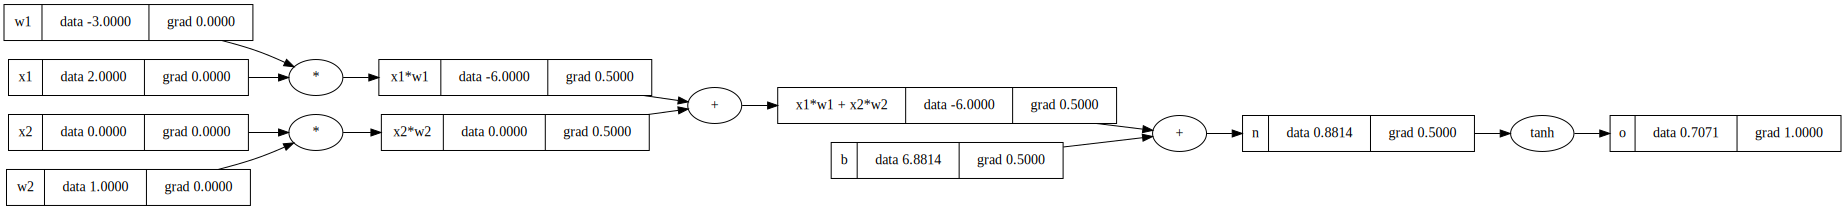

In [17]:
draw_trace(o)

In [12]:
# Base case
o.grad = 1

In [ ]:
print(f"Gradient of n BEFORE calling o._backward(): {n.grad}\n")
o._backward()
print(f"Gradient of n AFTER calling o._backward(): {n.grad}")

Gradient of n BEFORE calling o._backward(): 0
Gradient of n AFTER calling o._backward(): 0.4999999999999999


In [ ]:
print(f"Gradient of x1w1x2w2 BEFORE calling n._backward(): {x1w1x2w2.grad}")
print(f"Gradient of b        BEFORE calling n._backward(): {b.grad}\n")
n._backward()
print(f"Gradient of x1w1x2w2 AFTER calling n._backward(): {x1w1x2w2.grad}")
print(f"Gradient of b        AFTER calling n._backward(): {b.grad}")

Gradient of x1w1x2w2 BEFORE calling n._backward(): 0
Gradient of b        BEFORE calling n._backward(): 0
Gradient of x1w1x2w2 AFTER calling n._backward(): 0.4999999999999999
Gradient of b        AFTER calling n._backward(): 0.4999999999999999


In [15]:
# As b is a leaf node, calling _backward() on it doesn't do anything
b._backward()

In [16]:
print(f"Gradient of x1w1 BEFORE calling x1w1x2w2._backward(): {x1w1.grad}")
print(f"Gradient of x2w2 BEFORE calling x1w1x2w2._backward(): {x2w2.grad}\n")
x1w1x2w2._backward()
print(f"Gradient of x1w1 AFTER calling x1w1x2w2._backward(): {x1w1.grad}")
print(f"Gradient of x2w2 AFTER calling x1w1x2w2._backward(): {x2w2.grad}\n")

Gradient of x1w1 BEFORE calling x1w1x2w2._backward(): 0
Gradient of x2w2 BEFORE calling x1w1x2w2._backward(): 0

Gradient of x1w1 AFTER calling x1w1x2w2._backward(): 0.4999999999999999
Gradient of x2w2 AFTER calling x1w1x2w2._backward(): 0.4999999999999999



In [18]:
print(f"Gradient of x1 BEFORE calling x1w1._backward(): {x1.grad}")
print(f"Gradient of w1 BEFORE calling x1w1._backward(): {w1.grad}\n")
x1w1._backward()
print(f"Gradient of x1 AFTER calling x1w1._backward(): {x1.grad}")
print(f"Gradient of w1 AFTER calling x1w1._backward(): {w1.grad}")

Gradient of x1 BEFORE calling x1w1._backward(): 0
Gradient of w1 BEFORE calling x1w1._backward(): 0

Gradient of x1 AFTER calling x1w1._backward(): -1.4999999999999996
Gradient of w1 AFTER calling x1w1._backward(): 0.9999999999999998


In [19]:
print(f"Gradient of x2 BEFORE calling x2w2._backward(): {x2.grad}")
print(f"Gradient of w2 BEFORE calling x2w2._backward(): {w2.grad}\n")
x2w2._backward()
print(f"Gradient of x2 AFTER calling x2w2._backward(): {x2.grad}")
print(f"Gradient of w2 AFTER calling x2w2._backward(): {w2.grad}")

Gradient of x2 BEFORE calling x2w2._backward(): 0
Gradient of w2 BEFORE calling x2w2._backward(): 0

Gradient of x2 AFTER calling x2w2._backward(): 0.4999999999999999
Gradient of w2 AFTER calling x2w2._backward(): 0.0
